In [1]:
# Import country data
pip install geodatasets

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import geopandas as gpd
import geodatasets
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import StratifiedKFold

In [3]:
# Load data + rename columns
data = pd.read_excel("CountryData.xlsx", sheet_name = "data")
data.columns = ["Country", "CountryName", "ForeignInvestment", "ElectricityAccess", "RenewableEnergy", "CO2Emission", "Inflation", "MobileSubscriptions", "InternetUse", "Exports", "Imports", "GDP", "MortalityMale", "MortalityFemale", "BirthRate", "DeathRate", "MortalityInfant", "LifeExpectancy", "FertilityRate", "PopulationGrowth", "UrbanPopulation"]
data.head()

,Country,CountryName,ForeignInvestment,ElectricityAccess,RenewableEnergy,CO2Emission,Inflation,MobileSubscriptions,InternetUse,Exports,Imports,GDP,MortalityMale,MortalityFemale,BirthRate,DeathRate,MortalityInfant,LifeExpectancy,FertilityRate,PopulationGrowth,UrbanPopulation
0,ABW,Aruba,7.568160,93.356292,5.464716,24.670529,2.077739,129.636369,62.0,61.502448,74.816343,24271.940421,76.722,123.598,11.260,7.919,NaN,75.016,1.776,0.212680,43.059
1,AFG,Afghanistan,0.340097,42.700000,14.839806,0.293837,0.892537,35.467766,4.0,10.023850,44.943478,553.300289,228.971,271.299,39.232,8.095,65.7,61.226,5.816,2.812617,24.689
2,AGO,Angola,-3.913151,33.514950,54.193837,1.243406,14.470541,40.238403,2.8,62.387739,42.949968,3529.053482,233.617,306.825,45.314,10.450,75.4,58.192,6.162,3.570099,40.097
3,ALB,Albania,9.137790,100.000000,37.115330,1.578574,3.552267,91.560929,45.0,27.979471,48.564000,4094.358832,55.601,92.752,11.819,6.776,14.8,76.652,1.653,-0.496462,52.163
4,ARE,United Arab Emirates,3.034620,100.000000,0.108122,19.443690,0.878937,132.105386,68.0,77.713035,79.032891,35049.148317,61.349,87.243,11.656,1.474,7.3,76.344,1.869,7.587098,84.055


Task 1: Check missing values (NaN)

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              192 non-null    object 
 1   CountryName          192 non-null    object 
 2   ForeignInvestment    186 non-null    float64
 3   ElectricityAccess    192 non-null    float64
 4   RenewableEnergy      191 non-null    float64
 5   CO2Emission          188 non-null    float64
 6   Inflation            182 non-null    float64
 7   MobileSubscriptions  190 non-null    float64
 8   InternetUse          190 non-null    float64
 9   Exports              185 non-null    float64
 10  Imports              185 non-null    float64
 11  GDP                  191 non-null    float64
 12  MortalityMale        188 non-null    float64
 13  MortalityFemale      188 non-null    float64
 14  BirthRate            191 non-null    float64
 15  DeathRate            191 non-null    flo

,ForeignInvestment,ElectricityAccess,RenewableEnergy,CO2Emission,Inflation,MobileSubscriptions,InternetUse,Exports,Imports,GDP,MortalityMale,MortalityFemale,BirthRate,DeathRate,MortalityInfant,LifeExpectancy,FertilityRate,PopulationGrowth,UrbanPopulation
count,186.000000,192.000000,191.000000,188.000000,182.000000,190.000000,190.000000,185.000000,185.000000,191.000000,188.000000,188.000000,191.000000,191.000000,185.000000,189.000000,189.000000,192.000000,192.000000
mean,5.881855,78.240748,31.659505,4.878105,4.530093,89.254314,33.096221,43.544808,49.253265,13364.505839,144.701755,211.737206,22.335292,8.093897,27.860479,70.236538,2.933369,1.515959,56.408858
std,10.987837,30.941098,29.841833,6.445062,4.022375,42.274774,27.196408,34.734561,31.831732,18779.182547,102.842843,108.237023,10.826970,2.989552,24.726669,8.621780,1.485316,1.553161,23.911640
min,-15.989220,1.500000,0.000000,0.024260,-2.425257,1.184307,0.250000,0.109124,0.065880,231.194326,28.711000,68.677000,8.300000,1.474000,2.000000,47.560000,1.061000,-2.096943,9.092000
25%,1.494193,59.431767,5.605296,0.607425,1.708852,58.284768,8.000000,23.787730,30.726893,1335.880438,70.858750,122.078250,12.490000,5.920500,7.500000,64.357000,1.790000,0.486472,36.142250
50%,3.070926,97.948985,21.736052,2.501276,3.513100,92.274142,28.680000,36.845606,43.326791,5022.493191,108.179500,197.736000,20.580000,7.534000,17.700000,72.649000,2.412000,1.289291,56.266000
75%,6.772782,100.000000,52.986989,6.525163,6.383420,117.650532,53.225000,51.554323,59.520935,16279.821690,197.061750,274.843250,30.045000,9.862500,44.100000,76.246341,3.913000,2.333933,75.705500
max,105.785197,100.000000,96.827822,40.742018,28.187465,208.999216,93.390000,298.340631,284.973496,104965.306078,508.157000,588.836000,50.034000,16.572000,106.700000,82.978049,7.487000,11.220686,100.000000


Task 2: Replace missing values (e.g., with the column's mean).









In [5]:
for column in data.columns:
  if data[column].dtype != 'object':
# Handle missing values (imputation or removal)
    data[column] = data[column].fillna(data[column].mean())

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              192 non-null    object 
 1   CountryName          192 non-null    object 
 2   ForeignInvestment    192 non-null    float64
 3   ElectricityAccess    192 non-null    float64
 4   RenewableEnergy      192 non-null    float64
 5   CO2Emission          192 non-null    float64
 6   Inflation            192 non-null    float64
 7   MobileSubscriptions  192 non-null    float64
 8   InternetUse          192 non-null    float64
 9   Exports              192 non-null    float64
 10  Imports              192 non-null    float64
 11  GDP                  192 non-null    float64
 12  MortalityMale        192 non-null    float64
 13  MortalityFemale      192 non-null    float64
 14  BirthRate            192 non-null    float64
 15  DeathRate            192 non-null    flo

Task 3: Standardize the data

In [7]:
nova_data=data.iloc[:,2:]
nova_data.head()

,ForeignInvestment,ElectricityAccess,RenewableEnergy,CO2Emission,Inflation,MobileSubscriptions,InternetUse,Exports,Imports,GDP,MortalityMale,MortalityFemale,BirthRate,DeathRate,MortalityInfant,LifeExpectancy,FertilityRate,PopulationGrowth,UrbanPopulation
0,7.568160,93.356292,5.464716,24.670529,2.077739,129.636369,62.0,61.502448,74.816343,24271.940421,76.722,123.598,11.260,7.919,27.860479,75.016,1.776,0.212680,43.059
1,0.340097,42.700000,14.839806,0.293837,0.892537,35.467766,4.0,10.023850,44.943478,553.300289,228.971,271.299,39.232,8.095,65.700000,61.226,5.816,2.812617,24.689
2,-3.913151,33.514950,54.193837,1.243406,14.470541,40.238403,2.8,62.387739,42.949968,3529.053482,233.617,306.825,45.314,10.450,75.400000,58.192,6.162,3.570099,40.097
3,9.137790,100.000000,37.115330,1.578574,3.552267,91.560929,45.0,27.979471,48.564000,4094.358832,55.601,92.752,11.819,6.776,14.800000,76.652,1.653,-0.496462,52.163
4,3.034620,100.000000,0.108122,19.443690,0.878937,132.105386,68.0,77.713035,79.032891,35049.148317,61.349,87.243,11.656,1.474,7.300000,76.344,1.869,7.587098,84.055


In [8]:
nova_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ForeignInvestment    192 non-null    float64
 1   ElectricityAccess    192 non-null    float64
 2   RenewableEnergy      192 non-null    float64
 3   CO2Emission          192 non-null    float64
 4   Inflation            192 non-null    float64
 5   MobileSubscriptions  192 non-null    float64
 6   InternetUse          192 non-null    float64
 7   Exports              192 non-null    float64
 8   Imports              192 non-null    float64
 9   GDP                  192 non-null    float64
 10  MortalityMale        192 non-null    float64
 11  MortalityFemale      192 non-null    float64
 12  BirthRate            192 non-null    float64
 13  DeathRate            192 non-null    float64
 14  MortalityInfant      192 non-null    float64
 15  LifeExpectancy       192 non-null    flo

In [9]:
# Normalize/standardize the dataset for clustering
scaler=StandardScaler()
transformovana_data=scaler.fit_transform(nova_data)

In [10]:
t_data = pd.DataFrame(transformovana_data, columns = nova_data.columns)

In [11]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ForeignInvestment    192 non-null    float64
 1   ElectricityAccess    192 non-null    float64
 2   RenewableEnergy      192 non-null    float64
 3   CO2Emission          192 non-null    float64
 4   Inflation            192 non-null    float64
 5   MobileSubscriptions  192 non-null    float64
 6   InternetUse          192 non-null    float64
 7   Exports              192 non-null    float64
 8   Imports              192 non-null    float64
 9   GDP                  192 non-null    float64
 10  MortalityMale        192 non-null    float64
 11  MortalityFemale      192 non-null    float64
 12  BirthRate            192 non-null    float64
 13  DeathRate            192 non-null    float64
 14  MortalityInfant      192 non-null    float64
 15  LifeExpectancy       192 non-null    flo

Task 4: Apply a clustering algorithm to the scaled variables, assign a label to each country corresponding to the cluster it has been assigned to.

Assign the label to the original data using:
data["label"] = y_pred

In [12]:
ks = range(1, 6)
# inertia = sse
inertias = []

for k in ks:
# Apply K-Means clustering algorithm
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(t_data)
# Determine optimal clusters using Elbow Method
    inertias.append(model.inertia_)

print(inertias)

[3648.0000000000005, 2243.37208227655, 1910.114049121371, 1749.4290891122434, 1621.571082269348]


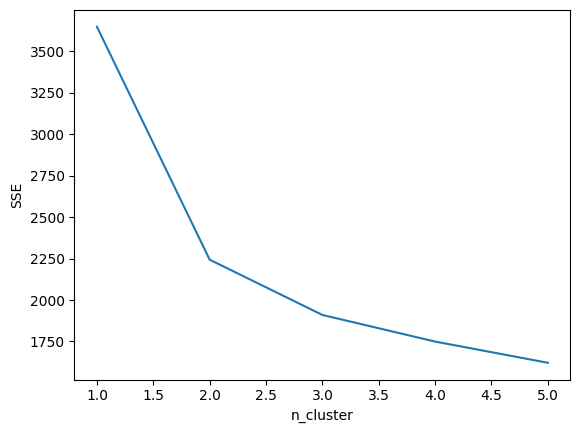

In [13]:
# Visualize the results
fig, ax = plt.subplots()
ax.plot(range(1,len(inertias)+1), inertias)
ax.set_xlabel("n_cluster")
ax.set_ylabel('SSE')
plt.show()

In [14]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [15]:
# Apply K-Means clustering algorithm
model = KMeans(n_clusters = 3)
model.fit(t_data)

KMeans(n_clusters=3)

In [16]:
y_pred = model.predict(t_data)

In [17]:
# Evaluate clustering performance using Silhouette Score
silhouette_avg = silhouette_score(t_data, y_pred)
print(f"Silhouette Coefficient: {silhouette_avg:.4f}")

Silhouette Coefficient: 0.2614


In [18]:
sil_indiv = silhouette_samples(t_data, y_pred)

In [19]:
sil_indiv

array([ 0.0169474 ,  0.33866219,  0.40318851,  0.3682947 ,  0.11484249,
        0.29390056,  0.42443106,  0.27940399,  0.20126318,  0.10963673,
        0.4141845 ,  0.50304285,  0.15742834,  0.4188327 ,  0.47385842,
        0.17876822,  0.24091286,  0.09375685,  0.2416827 ,  0.33958898,
        0.30577826,  0.36006379,  0.14796563,  0.30197358,  0.36472153,
        0.26512576,  0.10126859, -0.03929983,  0.10657128,  0.41620936,
        0.18274019,  0.21130968,  0.22741518,  0.37340059,  0.41927936,
        0.46284063,  0.49264414,  0.28809952,  0.41257202,  0.35234434,
        0.45524978,  0.3661957 ,  0.32140829, -0.02675266,  0.12688693,
        0.17584517,  0.3800763 ,  0.19238505,  0.46835826,  0.41786663,
        0.45495672,  0.3514948 ,  0.40302197, -0.01728051, -0.077604  ,
        0.45248928,  0.1813686 ,  0.4193851 ,  0.04372776,  0.0918578 ,
        0.10721715,  0.40264792,  0.26423159,  0.42917915,  0.38920221,
        0.49310289,  0.3032591 ,  0.14343759,  0.46863584,  0.26

In [20]:
# Assign the label to the original data.
data["label"] = y_pred

In [21]:
data["label"].value_counts()

,count
label,
2,89
1,58
0,45


In [22]:
!wget https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip -O ne_110m_admin_0_countries.zip
!unzip ne_110m_admin_0_countries.zip -d ne_110m_admin_0_countries
# Load the shapefile
world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")


--2025-02-20 08:49:53--  https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip
Resolving naciscdn.org (naciscdn.org)... 108.156.201.35, 108.156.201.55, 108.156.201.105, ...
Connecting to naciscdn.org (naciscdn.org)|108.156.201.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 214976 (210K) [application/zip]
Saving to: ‘ne_110m_admin_0_countries.zip’

ne_110m_admin_0_cou 100%[===================>] 209.94K  --.-KB/s    in 0.04s   

2025-02-20 08:49:53 (5.40 MB/s) - ‘ne_110m_admin_0_countries.zip’ saved [214976/214976]

Archive:  ne_110m_admin_0_countries.zip
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.README.html  
 extracting: ne_110m_admin_0_countries/ne_110m_admin_0_countries.VERSION.txt  
 extracting: ne_110m_admin_0_countries/ne_110m_admin_0_countries.cpg  
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.dbf  
  inflating: ne_110m_admin_0_countries/ne_110m_admin_0_countries.prj  
  inflating: ne

In [23]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3,GEOU_DIF,GEOUNIT,GU_A3,SU_DIF,SUBUNIT,SU_A3,BRK_DIFF,NAME,NAME_LONG,BRK_A3,BRK_NAME,BRK_GROUP,ABBREV,POSTAL,FORMAL_EN,FORMAL_FR,NAME_CIAWF,NOTE_ADM0,NOTE_BRK,NAME_SORT,NAME_ALT,MAPCOLOR7,MAPCOLOR8,MAPCOLOR9,MAPCOLOR13,POP_EST,POP_RANK,POP_YEAR,GDP_MD,GDP_YEAR,ECONOMY,INCOME_GRP,FIPS_10,ISO_A2,ISO_A2_EH,ISO_A3,ISO_A3_EH,ISO_N3,ISO_N3_EH,UN_A3,WB_A2,WB_A3,WOE_ID,WOE_ID_EH,WOE_NOTE,ADM0_ISO,ADM0_DIFF,ADM0_TLC,ADM0_A3_US,ADM0_A3_FR,ADM0_A3_RU,ADM0_A3_ES,ADM0_A3_CN,ADM0_A3_TW,ADM0_A3_IN,ADM0_A3_NP,ADM0_A3_PK,ADM0_A3_DE,ADM0_A3_GB,ADM0_A3_BR,ADM0_A3_IL,ADM0_A3_PS,ADM0_A3_SA,ADM0_A3_EG,ADM0_A3_MA,ADM0_A3_PT,ADM0_A3_AR,ADM0_A3_JP,ADM0_A3_KO,ADM0_A3_VN,ADM0_A3_TR,ADM0_A3_ID,ADM0_A3_PL,ADM0_A3_GR,ADM0_A3_IT,ADM0_A3_NL,ADM0_A3_SE,ADM0_A3_BD,ADM0_A3_UA,ADM0_A3_UN,ADM0_A3_WB,CONTINENT,REGION_UN,SUBREGION,REGION_WB,NAME_LEN,LONG_LEN,ABBREV_LEN,TINY,HOMEPART,MIN_ZOOM,MIN_LABEL,MAX_LABEL,LABEL_X,LABEL_Y,NE_ID,WIKIDATAID,NAME_AR,NAME_BN,NAME_DE,NAME_EN,NAME_ES,NAME_FA,NAME_FR,NAME_EL,NAME_HE,NAME_HI,NAME_HU,NAME_ID,NAME_IT,NAME_JA,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_UK,NAME_UR,NAME_VI,NAME_ZH,NAME_ZHT,FCLASS_ISO,TLC_DIFF,FCLASS_TLC,FCLASS_US,FCLASS_FR,FCLASS_RU,FCLASS_ES,FCLASS_CN,FCLASS_TW,FCLASS_IN,FCLASS_NP,FCLASS_PK,FCLASS_DE,FCLASS_GB,FCLASS_BR,FCLASS_IL,FCLASS_PS,FCLASS_SA,FCLASS_EG,FCLASS_MA,FCLASS_PT,FCLASS_AR,FCLASS_JP,FCLASS_KO,FCLASS_VN,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,FJI,0,Fiji,FJI,0,Fiji,FJI,0,Fiji,Fiji,FJI,Fiji,None,Fiji,FJ,Republic of Fiji,None,Fiji,None,None,Fiji,None,5,1,2,2,889953.0,11,2019,5496,2019,6. Developing region,4. Lower middle income,FJ,FJ,FJ,FJI,FJI,242,242,242,FJ,FJI,23424813,23424813,Exact WOE match as country,FJI,None,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,FJI,-99,-99,Oceania,Oceania,Melanesia,East Asia & Pacific,4,4,4,-99,1,0.0,3.0,8.0,177.975427,-17.826099,1159320625,Q712,فيجي,ফিজি,Fidschi,Fiji,Fiyi,فیجی,Fidji,Φίτζι,פיג'י,फ़िजी,Fidzsi-szigetek,Fiji,Figi,フィジー,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Фіджі,فجی,Fiji,斐济,斐濟,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,TZA,0,Tanzania,Tanzania,TZA,Tanzania,None,Tanz.,TZ,United Republic of Tanzania,None,Tanzania,None,None,Tanzania,None,3,6,2,2,58005463.0,16,2019,63177,2019,7. Least developed region,5. Low income,TZ,TZ,TZ,TZA,TZA,834,834,834,TZ,TZA,23424973,23424973,Exact WOE match as country,TZA,None,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,TZA,-99,-99,Africa,Africa,Eastern Africa,Sub-Saharan Africa,8,8,5,-99,1,0.0,3.0,8.0,34.959183,-6.051866,1159321337,Q924,تنزانيا,তানজানিয়া,Tansania,Tanzania,Tanzania,تانزانیا,Tanzanie,Τανζανία,טנזניה,तंज़ानिया,Tanzánia,Tanzania,Tanzania,タンザニア,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Танзанія,تنزانیہ,Tanzania,坦桑尼亚,坦尚尼亞,Admin-0 country,None,Admin-0 country,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,SAH,0,Western Sahara,SAH,0,Western Sahara,SAH,1,W. Sahara,Western Sahara,B28,W. Sahara,None,W. Sah.,WS,Sahrawi Arab Democratic Republic,None,Western Sahara,None,Self admin.; Claimed by Morocco,Western Sahara,None,4,7,4,4,603253.0,11,2017,907,2007,7. Least develope

In [24]:
# Merge data with the world map
world = world.merge(data, left_on='ISO_A3_EH', right_on='Country', how='left')

Task 5: Visualize the results

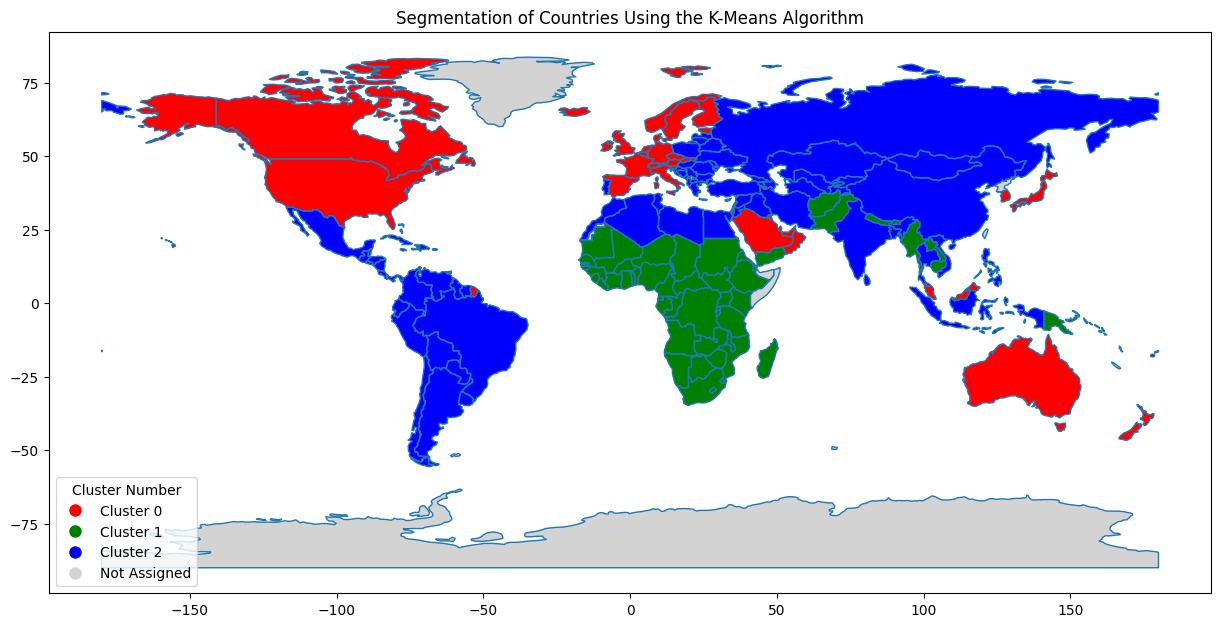

In [64]:
from matplotlib.lines import Line2D

cluster_labels = np.unique(y_pred)
colors = ["red", "green", "blue", "black"]

# Map clusters to colors
color_map = {cluster: colors[i] for i, cluster in enumerate(cluster_labels)}

# Assign colors to countries based on cluster labels, default to gray if NaN
# Handle missing values (imputation or removal)
world['color'] = world['label'].map(color_map).fillna('lightgray')

# Plot the map with clusters
# Visualize the results
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax, linewidth=1)
world.plot(color=world['color'], ax=ax, legend=False)

# Create custom legend
legend_handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[cluster], markersize=10, label=f'Cluster {int(cluster)}') for cluster in cluster_labels]
legend_handles.append(Line2D([0], [0], marker='o', color='w', markerfacecolor='lightgray', markersize=10, label='Not Assigned'))
ax.legend(handles=legend_handles, title="Cluster Number", loc='lower left')

# Add title
plt.title('Segmentation of Countries Using the K-Means Algorithm')

# Visualize the results
# Show plot
plt.show()


Task 6: Interpret the results – what kind of segmentation occurred? Would we expect a different distribution?

In [26]:
data[["CountryName", "label"]]
tier1 = data[data["label"]==0]
tier2 = data[data["label"]==1]
tier3 = data[data["label"]==2]

In [27]:
tier3[["CountryName"]]

,CountryName
3,Albania
5,Argentina
6,Armenia
7,Antigua and Barbuda
10,Azerbaijan
...,...
182,St. Vincent and the Grenadines
183,"Venezuela, RB"
185,Vietnam
186,Vanuatu


Task 7: Try applying a different algorithm. How did the results change?

Task 8: Apply PCA to the scaled variables. How much variability is explained by the first two components?

In [28]:
# Perform dimensionality reduction using PCA
model_PCA = PCA()
# Perform dimensionality reduction using PCA
pca_features = model_PCA.fit_transform(t_data)
# Perform dimensionality reduction using PCA
explained_variance = model_PCA.explained_variance_ratio_

In [29]:
pca_features

array([[ 2.91602765,  0.67904041, -0.01419097, ..., -0.03453182,
         0.10766477, -0.0623091 ],
       [-3.78771616,  0.02762257,  1.05421891, ..., -0.07354264,
         0.07561151, -0.17178352],
       [-4.87915315,  0.58788179,  0.93746381, ..., -0.22870924,
         0.09355496,  0.01331288],
       ...,
       [-2.09193447, -0.40459285, -1.42520264, ...,  0.25153173,
        -0.054499  ,  0.02229688],
       [-5.25480421,  0.58328856,  0.17868912, ...,  0.0111203 ,
         0.07220779, -0.10947656],
       [-5.36466559,  0.90157351, -1.27764616, ...,  0.38610946,
         0.26191592,  0.18681653]])

In [30]:
explained_variance

array([0.50208049, 0.11334531, 0.08563928, 0.07037395, 0.04844553,
       0.03911223, 0.02973105, 0.02577552, 0.02007075, 0.01561912,
       0.01236915, 0.00883411, 0.00805899, 0.00682389, 0.00574361,
       0.00502507, 0.001711  , 0.00068324, 0.0005577 ])

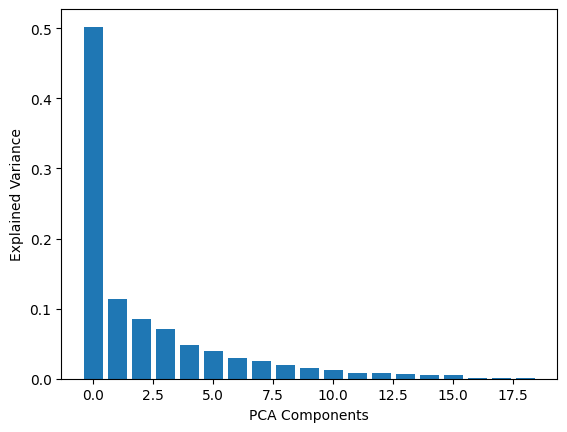

In [31]:
# Perform dimensionality reduction using PCA
plt.bar(range(model_PCA.n_components_), explained_variance)

plt.xlabel('PCA Components')
plt.ylabel('Explained Variance')
plt.show()

Task 9: Visualize a scatter plot of PCA1 vs. PCA2. Color the points according to the assigned cluster.

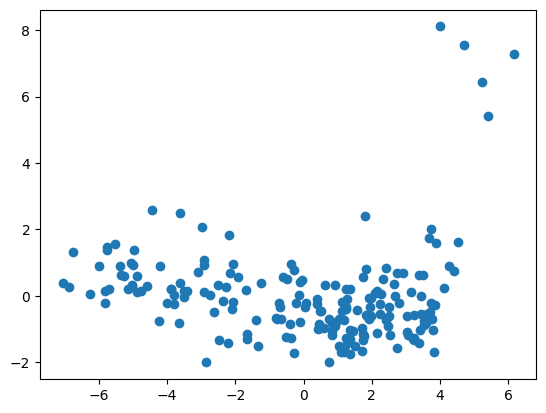

In [32]:
fig = plt.figure()

plt.scatter(
    pca_features[:, 0],
    pca_features[:, 1]
)
plt.show()

Task 10: Which of the original (scaled) variables is PCA1 strongly correlated with? Do the same for PCA2.

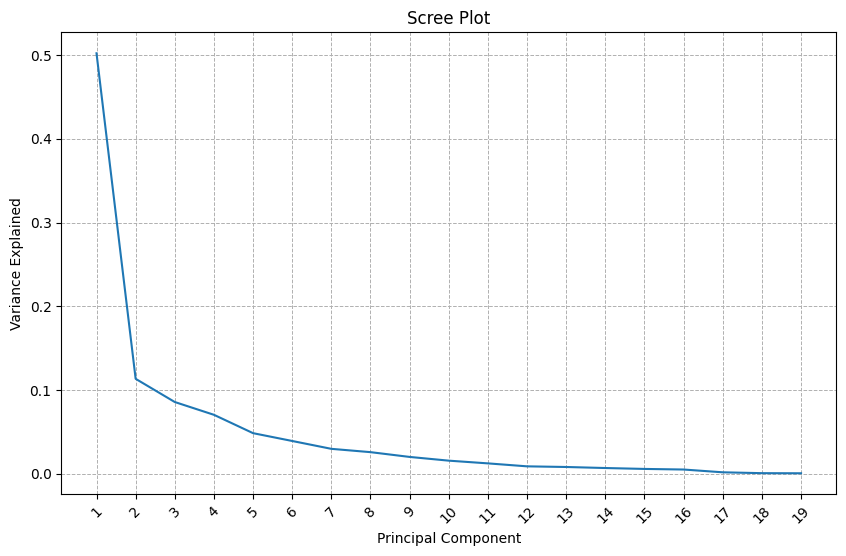

In [33]:
plt.figure(figsize=(10, 6))
# Visualize the results
plt.plot(range(1, len(explained_variance) + 1), explained_variance)
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title("Scree Plot")

plt.xticks(ticks=np.arange(1, len(explained_variance) + 1), rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.show()

In [34]:
pca1 = pca_features[:, 0]
correlations = np.corrcoef(pca1, t_data, rowvar=False)[0, 1:]
for i, col in enumerate(data.iloc[:,2:-1].columns):
# Perform dimensionality reduction using PCA
  print(f"Correlation between PCA1 and {col}: {correlations[i]:.4f}")

Correlation between PCA1 and ForeignInvestment: 0.1701
Correlation between PCA1 and ElectricityAccess: 0.8942
Correlation between PCA1 and RenewableEnergy: -0.7680
Correlation between PCA1 and CO2Emission: 0.5960
Correlation between PCA1 and Inflation: -0.3171
Correlation between PCA1 and MobileSubscriptions: 0.7706
Correlation between PCA1 and InternetUse: 0.8558
Correlation between PCA1 and Exports: 0.4036
Correlation between PCA1 and Imports: 0.1959
Correlation between PCA1 and GDP: 0.6796
Correlation between PCA1 and MortalityMale: -0.8973
Correlation between PCA1 and MortalityFemale: -0.8283
Correlation between PCA1 and BirthRate: -0.9122
Correlation between PCA1 and DeathRate: -0.4063
Correlation between PCA1 and MortalityInfant: -0.9049
Correlation between PCA1 and LifeExpectancy: 0.9553
Correlation between PCA1 and FertilityRate: -0.8810
Correlation between PCA1 and PopulationGrowth: -0.3764
Correlation between PCA1 and UrbanPopulation: 0.7338


Task 11: Can you interpret what characteristics are represented by PCA1 and PCA2?

In [35]:
pca2 = pca_features[:, 1]
correlations = np.corrcoef(pca2, t_data, rowvar=False)[0, 1:]
for i, col in enumerate(data.iloc[:,2:-1].columns):
# Perform dimensionality reduction using PCA
  print(f"Correlation between PCA2 and {col}: {correlations[i]:.4f}")

Correlation between PCA2 and ForeignInvestment: 0.6936
Correlation between PCA2 and ElectricityAccess: -0.1897
Correlation between PCA2 and RenewableEnergy: -0.0024
Correlation between PCA2 and CO2Emission: 0.1108
Correlation between PCA2 and Inflation: -0.1868
Correlation between PCA2 and MobileSubscriptions: 0.0403
Correlation between PCA2 and InternetUse: 0.0164
Correlation between PCA2 and Exports: 0.8150
Correlation between PCA2 and Imports: 0.8228
Correlation between PCA2 and GDP: 0.2146
Correlation between PCA2 and MortalityMale: 0.1462
Correlation between PCA2 and MortalityFemale: 0.0589
Correlation between PCA2 and BirthRate: 0.1503
Correlation between PCA2 and DeathRate: -0.0180
Correlation between PCA2 and MortalityInfant: 0.1756
Correlation between PCA2 and LifeExpectancy: -0.1071
Correlation between PCA2 and FertilityRate: 0.1660
Correlation between PCA2 and PopulationGrowth: 0.2742
Correlation between PCA2 and UrbanPopulation: 0.0871


In [36]:
# Apply DBSCAN clustering algorithm
#DBSCAN
# Import necessary libraries
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering algorithm
model_db = DBSCAN(eps=5.3, min_samples=20)
labels_db = model_db.fit_predict(t_data)

#plt.scatter(xs, ys, c=labels, alpha=.5)
#plt.show()

In [37]:
labels_db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0,  0])

In [38]:
from sklearn.cluster import estimate_bandwidth

X = t_data

estimate_bandwidth(X, quantile=0.5)

5.341223702253359

In [39]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

In [40]:
Z = linkage(t_data, method='ward')

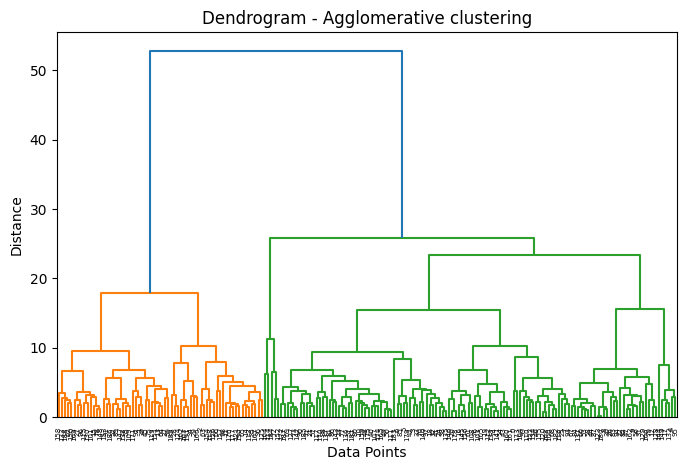

In [41]:
plt.figure(figsize=(8, 5))
dendrogram(Z)
plt.title("Dendrogram - Agglomerative clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [42]:
shluky=fcluster(Z, t=16, criterion='distance')

Text(0.5, 0, 'Parameter t')

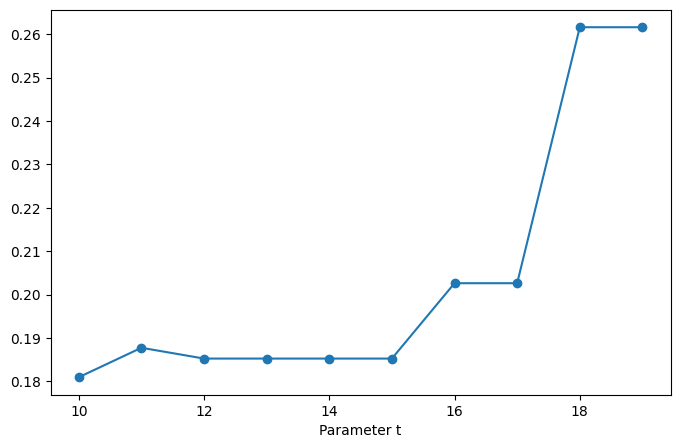

In [43]:
n_components = range(10, 20)  # Testing of 1 to 10 clusters
# Evaluate clustering performance using Silhouette Score
silhouette_score_fcluster = []

for n in n_components:
    shluky_fcluster = fcluster(Z, t=n, criterion='distance')
# Evaluate clustering performance using Silhouette Score
    silhouette_score_result = silhouette_score(t_data, shluky_fcluster)
# Evaluate clustering performance using Silhouette Score
    silhouette_score_fcluster.append(silhouette_score_result)

# Silhouette Score Visualization:
plt.figure(figsize=(8, 5))
# Visualize the results
plt.plot(n_components, silhouette_score_fcluster, marker='o', linestyle='-')
plt.xlabel("Parameter t")

In [44]:
shluky

array([4, 1, 2, 4, 5, 4, 4, 4, 5, 5, 4, 2, 5, 1, 2, 1, 4, 5, 4, 4, 4, 4,
       5, 4, 4, 4, 5, 1, 2, 2, 5, 5, 4, 4, 2, 2, 2, 1, 4, 1, 4, 4, 4, 4,
       5, 1, 4, 5, 4, 4, 4, 4, 1, 5, 4, 1, 5, 4, 5, 1, 5, 4, 1, 2, 1, 2,
       2, 5, 4, 4, 4, 4, 3, 4, 4, 1, 4, 4, 1, 5, 4, 4, 5, 5, 5, 4, 4, 5,
       4, 1, 4, 1, 1, 4, 5, 5, 1, 4, 2, 4, 4, 1, 2, 4, 3, 4, 5, 4, 4, 1,
       4, 4, 4, 2, 3, 1, 4, 4, 2, 1, 4, 2, 4, 5, 2, 2, 2, 4, 5, 5, 1, 5,
       5, 1, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 5, 4, 4, 1, 1, 5, 1, 1, 3, 1,
       2, 4, 4, 2, 1, 4, 4, 4, 5, 2, 4, 4, 2, 2, 4, 1, 4, 1, 4, 4, 4, 4,
       2, 2, 4, 4, 5, 4, 4, 4, 3, 4, 1, 4, 1, 2, 2, 2], dtype=int32)

In [45]:
np.unique(shluky, return_counts=True)

(array([1, 2, 3, 4, 5], dtype=int32), array([35, 29,  5, 90, 33]))

In [46]:
data["label_as"]=shluky

In [47]:
shluky_dvacet=fcluster(Z, t=20, criterion='distance')

In [48]:
np.unique(shluky_dvacet, return_counts=True)

(array([1, 2, 3, 4], dtype=int32), array([64,  5, 90, 33]))

In [49]:
data["label_as2"]=shluky_dvacet

In [50]:
pd.set_option('display.max_rows', None)

In [51]:
data[data["label_as"]==4]["CountryName"]

,CountryName
0,Aruba
3,Albania
5,Argentina
6,Armenia
7,Antigua and Barbuda
10,Azerbaijan
16,Bulgaria
18,"Bahamas, The"
19,Bosnia and Herzegovina
20,Belarus


Text(0.5, 0, 'Number of Clusters')

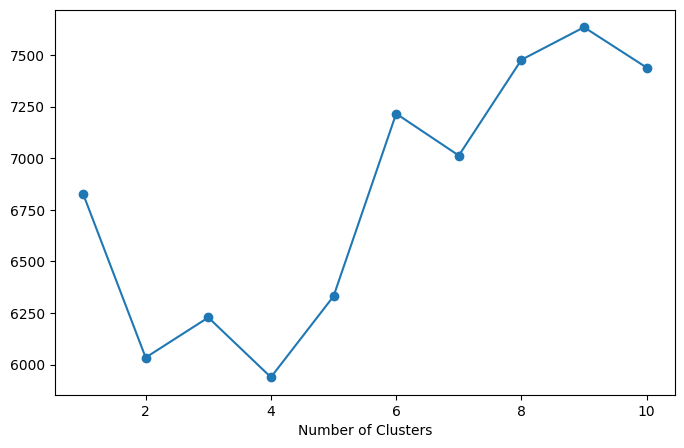

In [52]:
# Testin of different number of clusters
n_components = range(1, 11)  # Testing from 1 to 10 clusters
bics = []

for n in n_components:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(t_data)
    bics.append(gmm.bic(t_data))

# Visualization of BIC for different numbers of clusters
plt.figure(figsize=(8, 5))
# Visualize the results
plt.plot(n_components, bics, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")

In [53]:
bics

[6828.456393654335,
 6033.682849156932,
 6228.110694764359,
 5938.436874052202,
 6330.771351205887,
 7216.27407742628,
 7013.196513236461,
 7477.261143693448,
 7635.217464562541,
 7439.365752766862]

In [54]:
# Applying Gaussian Mixture Model with an assumed number of clusters (e.g., 4)
gmm = GaussianMixture(n_components=4, random_state=42)
data["Cluster"] = gmm.fit_predict(t_data)
gmm

GaussianMixture(n_components=4, random_state=42)

In [55]:
data["Cluster"].value_counts()

,count
Cluster,
2,66
0,64
1,49
3,13


In [56]:
data[data["Cluster"]==3]["Country"]

,Country
4,ARE
17,BHR
72,HKG
79,IRL
95,KWT
104,LUX
106,MAC
114,MLT
132,OMN
144,QAT


In [57]:
# Evaluate clustering performance using Silhouette Score
silhouette_kmeans = silhouette_score(t_data, y_pred)
silhouette_kmeans

0.26142072083984974

In [58]:
# Evaluate clustering performance using Silhouette Score
silhouette_fcluster = silhouette_score(t_data, shluky)
silhouette_fcluster

0.20262885495414595

In [59]:
# Evaluate clustering performance using Silhouette Score
silhouette_fcluster_2 = silhouette_score(t_data, shluky_dvacet)
silhouette_fcluster_2

0.2615911292652466

In [60]:
# Evaluate clustering performance using Silhouette Score
silhouette_gmm = silhouette_score(t_data, data["Cluster"])
silhouette_gmm

0.22017472866239238

In [61]:
#data[data["Cluster"]==3]["Country"]
data[data["Country"]=="CZE"]

,Country,CountryName,ForeignInvestment,ElectricityAccess,RenewableEnergy,CO2Emission,Inflation,MobileSubscriptions,InternetUse,Exports,Imports,GDP,MortalityMale,MortalityFemale,BirthRate,DeathRate,MortalityInfant,LifeExpectancy,FertilityRate,PopulationGrowth,UrbanPopulation,label,label_as,label_as2,Cluster
43,CZE,Czech Republic,4.900684,100.0,10.91772,10.652579,1.408718,122.757678,68.82,66.029521,62.937556,19808.071091,60.311,135.5,11.2,10.2,2.7,77.42439,1.51,0.291362,73.255,0,4,3,2
